In [7]:
import numpy as np;
import matplotlib.pyplot as plt;
import scipy.ndimage.filters as flt;
%matplotlib inline

Function to compute cummulative distribution of 1D slit image.

In [43]:
def cummulativeDist(input):
    size = len(input)
    
    cummulativeDistVals = np.zeros(size)
    
    cummulativeDistVals[0] = input[0]
    for i in range(1,size):
        cummulativeDistVals[i] = cummulativeDistVals[i-1]+input[i]
        
    return(cummulativeDistVals/np.sum(input))

# Generate Slit Function

The slit width will be 16 pixels wide to aid with the computation.

In [25]:
slit_width = 2;
magnification = 8;
function_size = 101;
slit = np.zeros(function_size);
slit[((function_size-1)/2-(slit_width*magnification)/2):((function_size-1)/2+(slit_width*magnification)/2)] = 1;
x = np.arange(function_size)

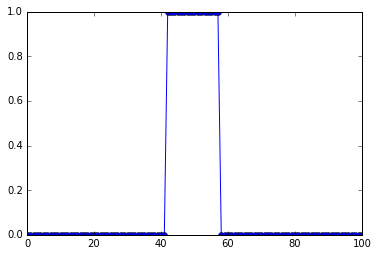

In [12]:
plt.plot(slit,'o-')

Pixel Size and RMS values from Zemax

In [14]:
pixel_size = 18.0;
yband_rms = 9.86;
jband_rms = 9.79;
hband_rms = 10.08;
kband_rms = 12.22;

Convert to $\sigma$ and magnified pixel values for convolution.

In [63]:
yband_sigma = yband_rms*magnification/pixel_size
jband_sigma = jband_rms*magnification/pixel_size
hband_sigma = hband_rms*magnification/pixel_size
kband_sigma = kband_rms*magnification/pixel_size

Y-band Slit Width Calculation Using a 1D Gaussian Convolution:

In [64]:
yout = flt.gaussian_filter1d(slit,yband_sigma)

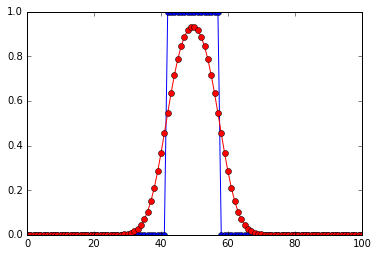

In [65]:
plt.plot(slit,'bo-',yout,'ro-')

(30, 70)

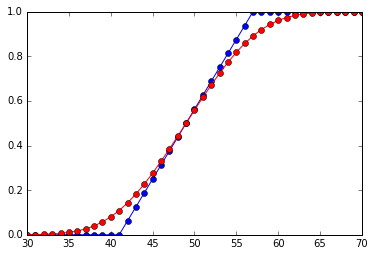

In [66]:
plt.plot(cummulativeDist(slit),'bo-',cummulativeDist(yout),'ro-')
plt.xlim(30,70)

Y-band energy enclosed within 2-pixel slit:

In [67]:
yslitimg = cummulativeDist(yout)
print(yslitimg[((function_size-1)/2+(slit_width*magnification)/2)]-yslitimg[((function_size-1)/2-(slit_width*magnification)/2)])

0.776770838109


J-band energy enclosed within 2-pixel slit:

In [68]:
jout = flt.gaussian_filter1d(slit,jband_sigma)
jslitimg = cummulativeDist(jout)
print(jslitimg[((function_size-1)/2+(slit_width*magnification)/2)]-jslitimg[((function_size-1)/2-(slit_width*magnification)/2)])

0.778311204515


H-band energy enclosed within 2-pixel slit:

In [69]:
hout = flt.gaussian_filter1d(slit,hband_sigma)
hslitimg = cummulativeDist(hout)
print(hslitimg[((function_size-1)/2+(slit_width*magnification)/2)]-hslitimg[((function_size-1)/2-(slit_width*magnification)/2)])

0.772016211944


K-band energy enclosed within 2-pixel slit:

In [70]:
kout = flt.gaussian_filter1d(slit,kband_sigma)
kslitimg = cummulativeDist(kout)
print(kslitimg[((function_size-1)/2+(slit_width*magnification)/2)]-kslitimg[((function_size-1)/2-(slit_width*magnification)/2)])

0.72572591519
